In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("data/fashion", one_hot=True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


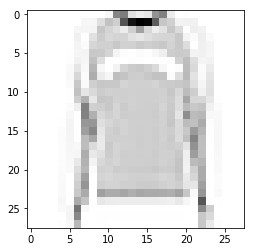

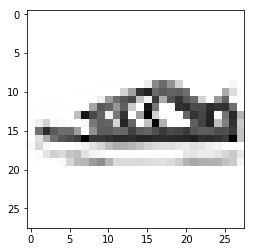

In [3]:
%matplotlib inline
sample_1 = fashion_mnist.train.images[100].reshape(28,28)
plt.imshow(sample_1, cmap='Greys')
plt.show()

sample_2 = fashion_mnist.train.images[500].reshape(28,28)
plt.imshow(sample_2, cmap='Greys')
plt.show()

In [4]:
# Training Parameters
learning_rate = 0.001
num_steps = 500
batch_size = 128
display_step = 10

In [5]:
# Network Parameters
num_input = 784 # data input (Image shape: 28*28)
num_classes = 10 # total classes (0-9 labels)
dropout = 0.75 # Dropout probability

In [6]:
# Create placeholder variables
def create_placeholders():  
    X = tf.placeholder(tf.float32, [None, num_input])
    Y = tf.placeholder(tf.float32, [None, num_classes])
    keep_prob = tf.placeholder(tf.float32)
    return X, Y, keep_prob

In [7]:
#Defines a conv layer with bias and activation
def conv2d(x, W, b, strides = 1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [8]:
#Defines a pooling layer
def maxpool2d(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [9]:
# Weights and Biases
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wf1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bf1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [10]:
def conv_net(x, weights, biases, dropout):
    
    # Fashion MNIST data is 1D input vector with 784 features(28*28).
    #Reshape it to a 4D tensor  with the second and third dimensions corresponding to image width and height,
    #and the final dimension corresponding to the number of color channels.
    x = tf.reshape(x, [-1, 28, 28, 1])
    
    # Convolution layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    #Max pooling
    conv1 = maxpool2d(conv1)
    
    
    #Convolution layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    #Max pooling
    conv2 = maxpool2d(conv2)
    
   
    #Fully connected layer
    fc1 = tf.reshape(conv2, [-1, 7*7*64])
    fc1 = tf.add(tf.matmul(fc1, weights['wf1']), biases['bf1'])
    fc1 = tf.nn.relu(fc1)

    #Apply dropout
    fc1 = tf.nn.dropout(fc1, dropout)
        
    
    #Output
    output = tf.matmul(fc1, weights['out']) + biases['out']
    return output

In [11]:
X, Y, keep_prob = create_placeholders()

#Forward Propagation
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

#Define the cost function and back propagate using Adam Optimizer which minimizes the loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [13]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
costs = []
with tf.Session() as sess:
    
    sess.run(init)
    for step in range(num_steps):
        minibatch_cost = 0
        batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
        #Run the session
        _, temp_cost = sess.run([train, loss], 
                feed_dict = {X:batch_x, Y:batch_y, keep_prob:dropout})
        minibatch_cost += temp_cost / fashion_mnist.train.num_examples
        
        if step % 10 == 0:
            print ("Cost after epoch %i: %f" % (step, minibatch_cost))
        if step % 1 == 0:
            costs.append(minibatch_cost)
        
    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    #Calculate accuracy of Fashion MNIST Test images
    print('Testing Accuracy:', sess.run(accuracy, 
                                    feed_dict={X: fashion_mnist.test.images,
                                    Y: fashion_mnist.test.labels,
                                    keep_prob: 1.0}))

Cost after epoch 0: 1.659150
Cost after epoch 10: 0.608858
Cost after epoch 20: 0.372702
Cost after epoch 30: 0.375746
Cost after epoch 40: 0.250847
Cost after epoch 50: 0.225200
Cost after epoch 60: 0.228168
Cost after epoch 70: 0.174243
Cost after epoch 80: 0.212020
Cost after epoch 90: 0.132564
Cost after epoch 100: 0.128432
Cost after epoch 110: 0.150560
Cost after epoch 120: 0.080409
Cost after epoch 130: 0.127283
Cost after epoch 140: 0.070057
Cost after epoch 150: 0.108661
Cost after epoch 160: 0.098016
Cost after epoch 170: 0.098951
Cost after epoch 180: 0.139625
Cost after epoch 190: 0.089985
Cost after epoch 200: 0.115758
Cost after epoch 210: 0.091064
Cost after epoch 220: 0.089274
Cost after epoch 230: 0.061314
Cost after epoch 240: 0.092893
Cost after epoch 250: 0.038881
Cost after epoch 260: 0.055857
Cost after epoch 270: 0.053117
Cost after epoch 280: 0.074610
Cost after epoch 290: 0.058586
Cost after epoch 300: 0.051636
Cost after epoch 310: 0.045091
Cost after epoch 32

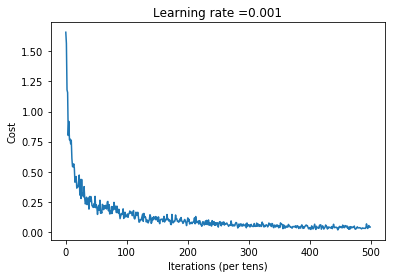

In [14]:
#Plot the cost function
import numpy as np
plt.plot(np.squeeze(costs))
plt.ylabel('Cost')
plt.xlabel('Iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()